# Zeri di funzione

## Bisezione

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Estremi intervallo
a = -1
b = 1

# Valore esatto dello zero
x_real = -0.7034674

# Tolleranza
tol = 1e-5

iter_max = 30

xx = np.linspace(a, b, 50)

def f(x: float) -> float:
    return np.exp(x) - x ** 2

Sequenza di valori approssimati:  [0.0, -0.5, -0.75, -0.625, -0.6875, -0.71875, -0.703125, -0.7109375, -0.70703125, -0.705078125, -0.7041015625, -0.70361328125, -0.703369140625, -0.7034912109375, -0.70343017578125, -0.703460693359375]


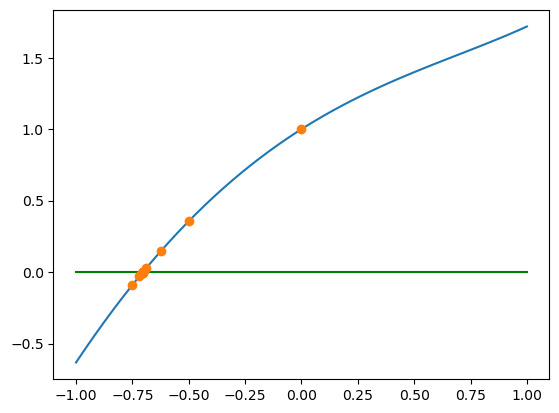

In [2]:
def bisezione(E_tol: float):
    # Controllo che f(a) e f(b) abbiano segno diverso
    if f(a) * f(b) > 0:
        return

    X = []
    E = []

    # n e' l'estremo negativo, p quello positivo
    n = b
    p = a

    if f(a) < f(b):
        n = a
        p = b

    q = (n+p) / 2
    X.append(q)
    E_abs = abs(q-x_real)
    E.append(E_abs)

    i = 0
    while E_abs > E_tol and i < iter_max:
        if f(q) <= 0:
            n = q
        else:
            p = q
        q = (n+p) / 2
        X.append(q)
        E_abs = abs(q-x_real)
        E.append(E_abs)
        i = i+1

    return (X, E)


bis, bis_err = bisezione(tol)

print("Sequenza di valori approssimati: ", bis)

plt.plot([a, b], [0, 0], 'g')
plt.plot(xx, list(map(f, xx)))
plt.plot(bis, list(map(f, bis)), 'o')
plt.show()

Errore finale:  6.706640624964955e-06
Numero iterazioni:  16


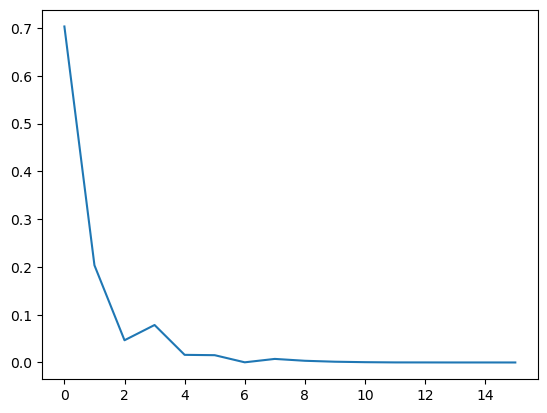

In [3]:
print("Errore finale: ", bis_err[len(bis_err)-1])
print("Numero iterazioni: ", len(bis_err))

plt.plot(range(len(bis_err)), bis_err)

plt.show()

## Punto fisso

In [4]:
def g1(x: float) -> float:
    return x - f(x)*np.exp(x/2)

def g2(x: float) -> float:
    return x - f(x)*np.exp(-(x/2))

def iterazione_punto_fisso(E_tol: float, g):
    # Valore iniziale della successione
    k = 0

    K = []
    E = []
    K.append(k)
    E_abs = abs(k-x_real)
    E.append(E_abs)

    i = 0

    while E_abs > E_tol and i < iter_max:
        k = g(k)
        K.append(k)
        E_abs = abs(k-x_real)
        E.append(E_abs)
        i = i + 1

    return (K, E)

Sequenza di valori approssimati:  [0, -1.0, -0.6165995004357965, -0.7338435246584389, -0.6933345448824065, -0.7069051525969913, -0.7023076178704657, -0.703859456173084, -0.7033349933164843, -0.7035121668368846, -0.7034523056689461, -0.703472529830166]


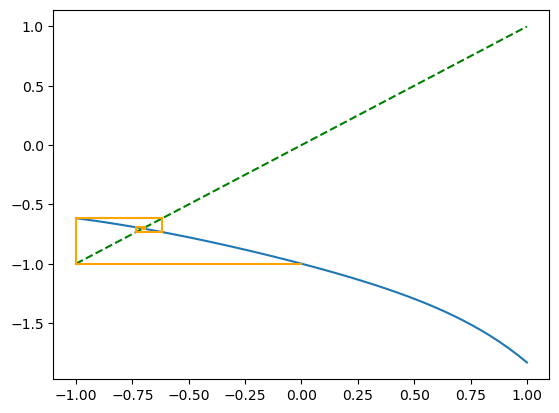

In [5]:
iter, iter_err = iterazione_punto_fisso(tol, g1)

print("Sequenza di valori approssimati: ", iter)

plt.plot(xx, list(map(g1, xx)))
plt.plot(xx, xx, 'g--')

for i in range(1, len(iter)):
    plt.plot([iter[i], iter[i]], [iter[i], g1(iter[i])], 'orange')
for i in range(len(iter)-1):
    plt.plot([iter[i], iter[i+1]], [iter[i+1], iter[i+1]], 'orange')

plt.show()

Errore finale:  5.129830165984117e-06
Numero iterazioni:  12


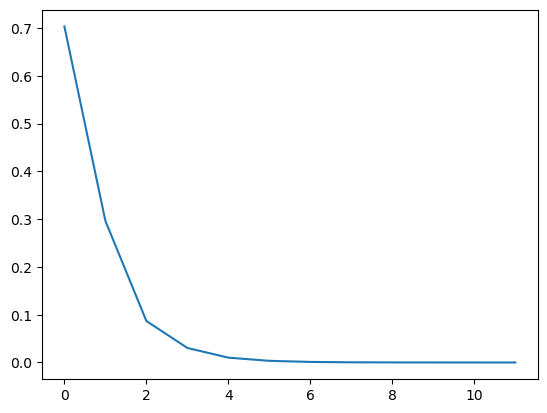

In [6]:
print("Errore finale: ", iter_err[len(iter_err)-1])
print("Numero iterazioni: ", len(iter_err))

plt.plot(range(len(iter_err)), iter_err)

plt.show()

Sequenza di valori approssimati:  [0, -1.0, 0.04219061098749477, -0.9773858830528239, -0.03352613192307563, -1.0157597823175533, 0.09702533074477615, -0.9437152144961736, -0.13995581176586758, -1.0513628038444836, 0.2273303877794266, -0.8469200316186289, -0.4062509223670533, -1.0202156611772513, 0.11284210086837154, -0.933166175874689, -0.1717867212396067, -1.0573213156007193, 0.2500273708269216, -0.8279692105370147, -0.4518827984392697, -0.9936849251005214, 0.02069742193710289, -0.9892810492167196, 0.005869723727124354, -0.9970350963716603, 0.03206571138026404, -0.9830845040287752, -0.014771525058194568, -1.0071931547719282, 0.06700549241461906]


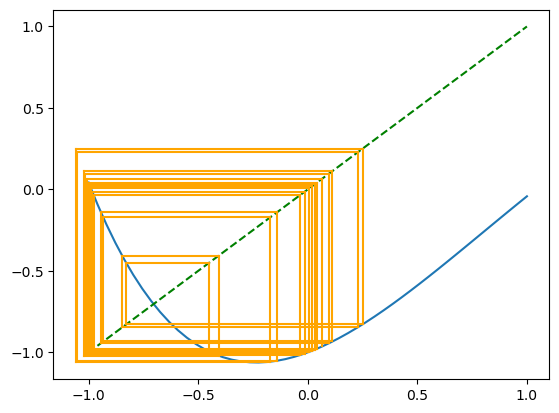

In [7]:
iter, iter_err = iterazione_punto_fisso(tol, g2)

print("Sequenza di valori approssimati: ", iter)

plt.plot(xx, list(map(g2, xx)))
plt.plot(xx, xx, 'g--')

for i in range(1, len(iter)):
    plt.plot([iter[i], iter[i]], [iter[i], g2(iter[i])], 'orange')
for i in range(len(iter)-1):
    plt.plot([iter[i], iter[i+1]], [iter[i+1], iter[i+1]], 'orange')

plt.show()

Errore finale:  0.770472892414619
Numero iterazioni:  31


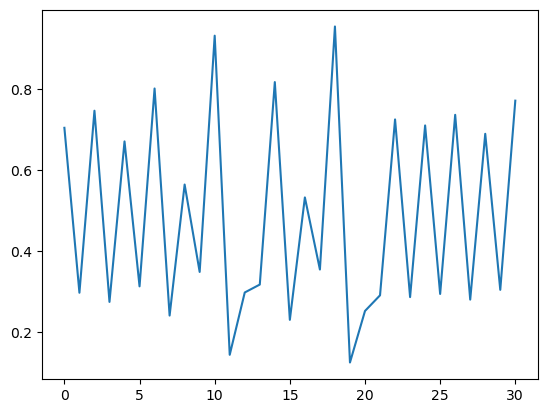

In [8]:
print("Errore finale: ", iter_err[len(iter_err)-1])
print("Numero iterazioni: ", len(iter_err))

plt.plot(range(len(iter_err)), iter_err)

plt.show()

## Metodo di Newton

In [9]:
def Df(x: float) -> float:
    return np.exp(x) - 2*x


def g3(x: float) -> float:
    return x - f(x)/Df(x)


def newton(E_tol: float):
    # Valore iniziale successione
    k=0

    K = []
    K.append(k)
    E = []
    E_abs = abs(k - x_real)
    E.append(E_abs)

    i = 0
    while E_abs > E_tol and i < iter_max:
        D = Df(k)

        # Controllo che la derivata prima non sia nulla
        if D == 0:
            return

        k = k - f(k)/Df(k)
        K.append(k)
        E_abs = abs(k - x_real)
        E.append(E_abs)
        i = i+1

    return (K, E)

Sequenza di valori approssimati:  [0, -1.0, -0.7330436052454454, -0.703807786324133, -0.7034674683317975]


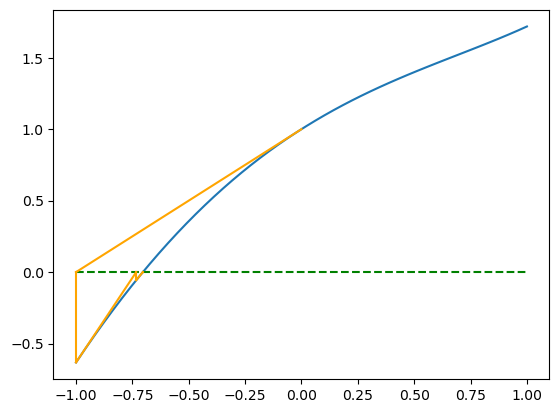

In [10]:
newt, newt_err = newton(tol)

print("Sequenza di valori approssimati: ", newt)

plt.plot(xx, list(map(f, xx)))
plt.plot([a, b], [0, 0], 'g--')

for i in range(len(newt)-1):
    plt.plot([newt[i], newt[i+1]], [f(newt[i]), 0], 'orange')
for i in range(1, len(newt)):
    plt.plot([newt[i], newt[i]], [f(newt[i]), 0], 'orange')

plt.show()

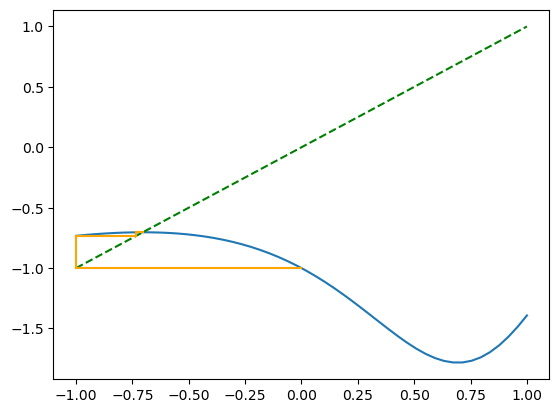

In [11]:
plt.plot(xx, list(map(g3, xx)))
plt.plot([a, b], [a, b], 'g--')
for i in range(len(newt)-1):
    plt.plot([newt[i], newt[i+1]], [g3(newt[i]), g3(newt[i])], 'orange')
for i in range(1, len(newt)):
    plt.plot([newt[i], newt[i]], [g3(newt[i]), g3(newt[i-1])], 'orange')

plt.show()

Errore finale:  6.83317975536113e-08
Numero iterazioni:  5


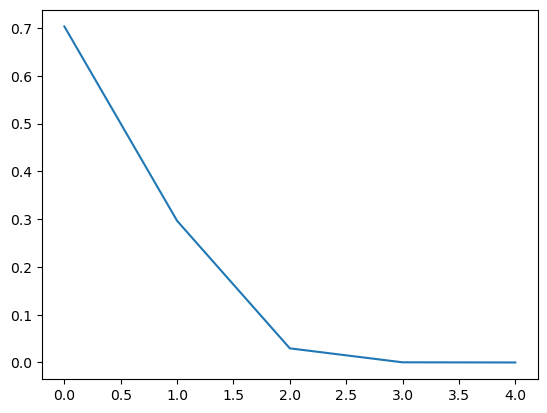

In [12]:
print("Errore finale: ", newt_err[len(newt_err)-1])
print("Numero iterazioni: ", len(newt_err))

plt.plot(range(len(newt_err)), newt_err)

plt.show()